# Unit 5 - Financial Planning

In [1]:
# Import liberaries
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
#request crypto data
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()

print(json.dumps(data_btc, indent=3))

response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
print(json.dumps(data_eth, indent=3))

{
   "data": {
      "1": {
         "id": 1,
         "name": "Bitcoin",
         "symbol": "BTC",
         "website_slug": "bitcoin",
         "rank": 1,
         "circulating_supply": 18824543,
         "total_supply": 18824543,
         "max_supply": 21000000,
         "quotes": {
            "USD": {
               "price": 44500.0,
               "volume_24h": 32412953405,
               "market_cap": 838537307011,
               "percentage_change_1h": -0.540968842549717,
               "percentage_change_24h": 1.83278407985207,
               "percentage_change_7d": -7.05891011569808,
               "percent_change_1h": -0.540968842549717,
               "percent_change_24h": 1.83278407985207,
               "percent_change_7d": -7.05891011569808
            },
            "CAD": {
               "price": 56839.85,
               "volume_24h": 41401065384.2065,
               "market_cap": 1071063702245.15,
               "percent_change_1h": -0.540968842549717,
               

In [6]:
# current BTC price
btc_value = data_btc["data"]["1"]["quotes"]["CAD"]["price"]
my_btc_value = my_btc * btc_value
# current ETH price
eth_value = data_eth["data"]["1027"]["quotes"]["CAD"]["price"]
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $68207.82
The current value of your 5.3 ETH is $21007.30


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [9]:
# Format current date
today = pd.Timestamp("2021-09-21", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"
# Get current closing prices for SPY and AGG
portfolio = api.get_barset( tickers, timeframe, start=today, end=today,).df
# time component of the date
portfolio.index = portfolio.index.date
# Preview DataFrame
portfolio.head()


AGG                                        SPY                  \
              open    high      low    close   volume    open    high     low   
2021-09-21  116.13  116.17  116.045  116.135  4455403  436.53  437.91  433.07   

                              
             close    volume  
2021-09-21  433.67  82418070

In [10]:
# Pick AGG and SPY close prices
agg_closing_price = float(portfolio["AGG"]["close"])
spy_closing_price = float(portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_closing_price}")
print(f"Current SPY closing price: ${spy_closing_price}")

Current AGG closing price: $116.135
Current SPY closing price: $433.67


In [11]:
# Compute the current value of shares
my_agg_value = my_agg * agg_closing_price 
my_spy_value = my_spy * spy_closing_price 
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21683.50
The current value of your 200 AGG shares is $23227.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]} 
# Creates pandas DataFrame. 
savings = pd.DataFrame(data, index =['crypto', 'shares']) 
# print the data 
savings


,amount
crypto,89215.115827
shares,44910.500000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

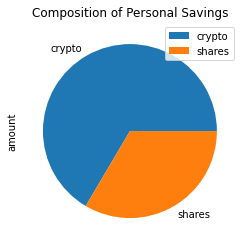

In [13]:
# Plot savings pie chart
savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [14]:
#emergency fund
emergency_fund = monthly_income * 3
# Calculate total amount of savings
total_savings = total_crypto + total_shares_value

# Validate saving health
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")



Congratuations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today
start_date = pd.Timestamp('2016-09-21', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-09-21', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]
stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df
# Drop the time component
stock_data.index = stock_data.index.date
# Display sample data
stock_data.head()

AGG                                           SPY          \
              open     high       low     close   volume    open    high   
2021-04-30  114.41  114.515  114.3300  114.5000  5160765  417.63  418.54   
2021-05-03  114.40  114.590  114.3300  114.4000  5537985  419.43  419.84   
2021-05-04  114.55  114.700  114.4100  114.5285  4677045  416.08  416.60   
2021-05-05  114.45  114.620  114.4222  114.6100  3861137  417.38  417.63   
2021-05-06  114.55  114.710  114.5300  114.6500  4557111  415.83  419.21   

                                       
                low   close    volume  
2021-04-30  416.340  417.30  73129109  
2021-05-03  417.665  418.18  60956273  
2021-05-04  411.670  415.64  88484568  
2021-05-05  414.940  415.72  51316402  
2021-05-06  413.675  419.08  65397203

In [17]:
# Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_30 = MCSimulation(portfolio_data = stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [18]:
# Printing the simulation input data
MC_even_30.portfolio_data.head()

AGG                                                        SPY  \
              open     high       low     close   volume daily_return    open   
2021-04-30  114.41  114.515  114.3300  114.5000  5160765          NaN  417.63   
2021-05-03  114.40  114.590  114.3300  114.4000  5537985    -0.000873  419.43   
2021-05-04  114.55  114.700  114.4100  114.5285  4677045     0.001123  416.08   
2021-05-05  114.45  114.620  114.4222  114.6100  3861137     0.000712  417.38   
2021-05-06  114.55  114.710  114.5300  114.6500  4557111     0.000349  415.83   

                                                            
              high      low   close    volume daily_return  
2021-04-30  418.54  416.340  417.30  73129109          NaN  
2021-05-03  419.84  417.665  418.18  60956273     0.002109  
2021-05-04  416.60  411.670  415.64  88484568    -0.006074  
2021-05-05  417.63  414.940  415.72  51316402     0.000192  
2021-05-06  419.21  413.675  419.08  65397203     0.008082

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/Harmish/Documents/FinTech/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004581,1.000793,1.001886,0.994344,1.002836,0.999934,1.000461,1.004365,1.000078,0.997513,...,0.996425,1.007595,0.995144,1.003089,0.998350,0.999727,1.003008,0.998178,1.002339,1.003137
2,1.007901,1.002115,1.009768,0.997426,1.003422,0.997297,1.002320,0.998156,1.003606,0.995020,...,0.996439,1.011545,0.993394,1.001309,0.996657,0.995934,1.005300,0.994047,1.004780,1.010731
3,1.012683,1.003195,1.012522,1.005273,1.004803,0.999796,0.998756,1.001507,1.007422,0.992584,...,0.997311,1.013366,0.987684,1.001957,0.999394,0.999173,1.009238,0.996841,1.001939,1.014396
4,1.014290,1.005374,1.010565,1.004987,1.014638,0.999054,1.003305,1.001964,1.003103,0.995796,...,0.995623,1.010719,0.985147,1.000952,1.004345,1.001495,0.997144,1.005776,1.000402,1.011449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.080123,5.390139,4.521363,11.731485,8.783136,14.732037,7.225485,11.320243,5.234843,17.465071,...,5.575566,13.472506,9.378141,10.235040,9.403027,15.382155,4.411110,20.723540,6.626291,11.350913
7557,10.028816,5.424366,4.523346,11.807637,8.740456,14.752684,7.234541,11.280973,5.223457,17.450465,...,5.592434,13.465982,9.364995,10.162760,9.435284,15.361392,4.465011,20.759246,6.597905,11.391282
7558,9.983406,5.404740,4.516509,11.784923,8.725328,14.682456,7.204347,11.310725,5.227381,17.493720,...,5.569231,13.455290,9.465112,10.142376,9.414463,15.449296,4.466553,20.787993,6.623600,11.299199
7559,9.967995,5.361064,4.531922,11.730386,8.726123,14.710543,7.221050,11.347552,5.226760,17.558344,...,5.596144,13.419204,9.478742,10.135528,9.453578,15.505105,4.470850,20.720572,6.628384,11.383263


In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

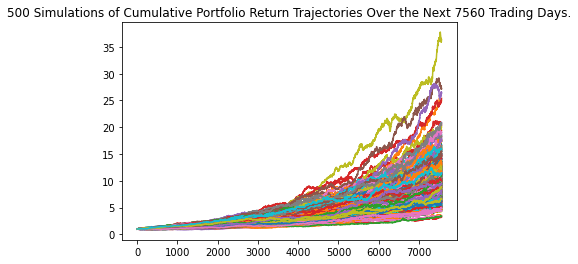

In [21]:
# Plot simulation outcomes
line_plot = MC_even_30.plot_simulation()

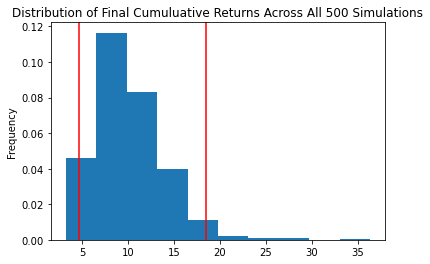

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_30.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
even_30 = MC_even_30.summarize_cumulative_return()
print (even_30)

count           500.000000
mean             10.096773
std               3.879864
min               3.222020
25%               7.382835
50%               9.470233
75%              12.334516
max              36.356967
95% CI Lower      4.665501
95% CI Upper     18.532719
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_30[8]*20000,2)
ci_upper = round(even_30[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio over the next 30 years will end within in the range of ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $93310.01 and $370654.39


In [25]:
# Set initial investment
initial_investment = 20000 * 1.5
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_30[8]*30000,2)
ci_upper = round(even_30[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $139965.02 and $555981.58


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_5 = MCSimulation(portfolio_data = stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_5.portfolio_data.head()


AGG                                                        SPY  \
              open     high       low     close   volume daily_return    open   
2021-04-30  114.41  114.515  114.3300  114.5000  5160765          NaN  417.63   
2021-05-03  114.40  114.590  114.3300  114.4000  5537985    -0.000873  419.43   
2021-05-04  114.55  114.700  114.4100  114.5285  4677045     0.001123  416.08   
2021-05-05  114.45  114.620  114.4222  114.6100  3861137     0.000712  417.38   
2021-05-06  114.55  114.710  114.5300  114.6500  4557111     0.000349  415.83   

                                                            
              high      low   close    volume daily_return  
2021-04-30  418.54  416.340  417.30  73129109          NaN  
2021-05-03  419.84  417.665  418.18  60956273     0.002109  
2021-05-04  416.60  411.670  415.64  88484568    -0.006074  
2021-05-05  417.63  414.940  415.72  51316402     0.000192  
2021-05-06  419.21  413.675  419.08  65397203     0.008082

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/Harmish/Documents/FinTech/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007334,0.999880,1.006997,0.996201,0.994580,1.009699,0.997647,0.998443,1.002490,0.999271,...,0.998351,0.996663,1.010839,1.000646,1.001569,1.001397,1.006339,0.999947,1.001262,0.998713
2,1.004855,0.998178,1.005641,1.000035,0.987763,1.007332,0.998217,0.994201,1.007353,0.996907,...,0.998681,0.997950,1.017704,0.999767,0.997318,0.999558,1.004968,1.008914,1.002058,0.994876
3,1.001911,0.992452,1.002508,1.010271,0.989067,1.005179,0.998886,0.994196,0.997828,0.990157,...,0.997283,0.996162,1.020328,1.004154,0.998802,1.002718,1.009711,1.005821,1.001898,0.997194
4,0.997272,0.987354,1.008926,1.014057,0.987875,1.003773,0.999239,0.997165,1.001313,0.993263,...,0.992653,1.000235,1.016842,1.004398,0.998837,1.000068,1.014267,1.001342,1.004467,1.000321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.692645,1.341091,1.852882,1.490985,1.403043,1.527154,1.425731,1.328261,1.245912,2.188231,...,1.140785,1.355722,1.292379,1.418725,1.367361,1.504672,1.644382,1.935412,1.228650,1.361331
1257,1.692945,1.343468,1.845958,1.498755,1.402819,1.525643,1.425686,1.318611,1.245381,2.185745,...,1.145020,1.355124,1.297831,1.411646,1.380149,1.500032,1.629366,1.928717,1.230299,1.366568
1258,1.695929,1.342058,1.845483,1.508077,1.403980,1.537345,1.427884,1.320105,1.249871,2.169269,...,1.149774,1.354492,1.300903,1.407325,1.386572,1.503175,1.633513,1.935719,1.232230,1.366293
1259,1.702408,1.346592,1.855537,1.512174,1.405843,1.534535,1.428723,1.323335,1.252066,2.167876,...,1.146847,1.358219,1.298642,1.410162,1.379243,1.511761,1.638290,1.935994,1.231498,1.368143


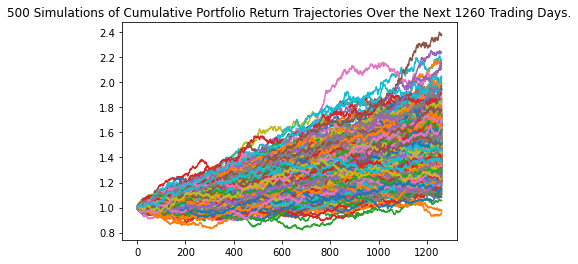

In [28]:
# Plot simulation outcomes
line_plot_five = MC_even_5.plot_simulation()

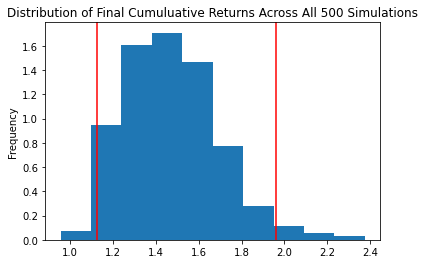

In [29]:
# Plot probability distribution and confidence intervals
dist_plot_5 = MC_even_5.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
even_5 = MC_even_5.summarize_cumulative_return()
# Print summary statistics
print(even_5)

count           500.000000
mean              1.474431
std               0.216801
min               0.957183
25%               1.313321
50%               1.451091
75%               1.615780
max               2.374495
95% CI Lower      1.127340
95% CI Upper      1.960909
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment_5 = 75000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5 = round(even_5[8]*75000,2)
ci_upper_5 = round(even_5[9]*75000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5} and ${ci_upper_5}")

There is a 95% chance that an initial investment of $75000 in the portfolio over the next 5 years will end within in the range of $84550.52 and $147068.16


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_10 = MCSimulation(portfolio_data = stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_10.portfolio_data.head()

AGG                                                        SPY  \
              open     high       low     close   volume daily_return    open   
2021-04-30  114.41  114.515  114.3300  114.5000  5160765          NaN  417.63   
2021-05-03  114.40  114.590  114.3300  114.4000  5537985    -0.000873  419.43   
2021-05-04  114.55  114.700  114.4100  114.5285  4677045     0.001123  416.08   
2021-05-05  114.45  114.620  114.4222  114.6100  3861137     0.000712  417.38   
2021-05-06  114.55  114.710  114.5300  114.6500  4557111     0.000349  415.83   

                                                            
              high      low   close    volume daily_return  
2021-04-30  418.54  416.340  417.30  73129109          NaN  
2021-05-03  419.84  417.665  418.18  60956273     0.002109  
2021-05-04  416.60  411.670  415.64  88484568    -0.006074  
2021-05-05  417.63  414.940  415.72  51316402     0.000192  
2021-05-06  419.21  413.675  419.08  65397203     0.008082

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/Harmish/Documents/FinTech/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999317,0.991859,0.995523,1.008977,0.994967,0.999085,0.999616,0.992727,1.001402,1.004919,...,1.002585,0.998846,1.000316,1.002864,1.001611,1.001122,1.001127,0.999895,0.999711,0.997133
2,0.992290,0.984611,1.010267,1.022474,0.990515,0.994532,1.002340,0.992913,1.003687,1.001421,...,1.010826,0.996842,1.001966,1.003635,1.001941,1.000810,1.000268,0.997328,1.000218,0.995674
3,0.994499,0.978615,1.009809,1.026753,0.991256,0.997285,1.010108,0.998835,0.998546,1.001288,...,1.008377,1.000526,1.008835,0.993378,1.002351,1.003469,0.992544,0.995414,1.007767,0.996153
4,1.000789,0.976567,1.013479,1.026313,0.989947,0.997460,1.012541,0.994090,0.991946,1.006530,...,1.004542,1.000098,1.012779,0.997263,1.000150,1.004225,0.997641,0.994598,1.011361,0.990298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.467285,1.888398,1.473449,2.472494,2.367897,2.551541,2.448292,2.157200,1.857856,1.741424,...,1.980814,1.441178,2.061695,2.125040,1.912154,2.080157,1.502703,1.770926,2.778857,2.384268
2517,1.460382,1.885875,1.478483,2.478499,2.363248,2.548410,2.451417,2.144387,1.862710,1.746085,...,1.968030,1.441388,2.076055,2.118865,1.902082,2.089180,1.509871,1.776456,2.764369,2.377175
2518,1.450774,1.876181,1.483444,2.455994,2.390405,2.544465,2.461778,2.154731,1.879241,1.750318,...,1.961385,1.437659,2.075668,2.107739,1.904729,2.091153,1.507394,1.791853,2.763548,2.367269
2519,1.442922,1.886066,1.483823,2.450940,2.376465,2.552227,2.438590,2.144429,1.877889,1.764996,...,1.961046,1.436420,2.071953,2.092713,1.913722,2.084643,1.513395,1.791788,2.744972,2.373030


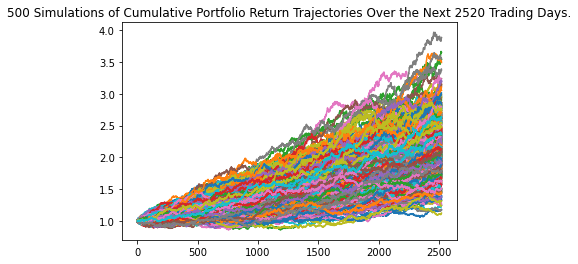

In [34]:
# Plot simulation outcomes
line_plot_10 = MC_even_10.plot_simulation()


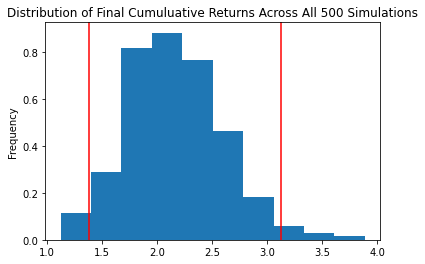

In [35]:
# Plot probability distribution and confidence intervals
bar_plot_10 = MC_even_10.plot_distribution()

In [36]:
# summary statistics from the Monte Carlo simulation results
even_10 = MC_even_10.summarize_cumulative_return()
# Print summary statistics
print(even_10)

count           500.000000
mean              2.157550
std               0.434961
min               1.122579
25%               1.868500
50%               2.099952
75%               2.412092
max               3.885653
95% CI Lower      1.383887
95% CI Upper      3.120393
Name: 2520, dtype: float64


In [37]:
# Set initial investment
initial_investment_10 = 75000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10 = round(even_10[8]*75000,2)
ci_upper_10 = round(even_10[9]*75000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10} and ${ci_upper_10}")

There is a 95% chance that an initial investment of $75000 in the portfolio over the next 10 years will end within in the range of $103791.49 and $234029.5
